<h1> Applied Data Science Coursera Capstone </h1>

The purpose of this notebook is to accomplish the Applied Data Science Coursera Capstone requirements

In [1]:
#!jt -t oceans16 -fs 12 -ofs 12
import pandas as pd
import numpy as np
print("Hello Capstone Project Course!")

Hello Capstone Project Course!


Business Understanding - A description of the problem and a discussion of the background. 

Predict accident severity taking into account:
<ul>
    <li> Weather Conditions </li>
    <li> Road Conditions </li>
</ul>

Data Understanding - A description of the data and how it will be used to solve the problem. 

Attributes to use:
<ul>
    <li> Location </li>
    <li> Road Condition </li>
    <li> Weather Condition </li>
    <li> Junction Type </li>
    <li> Car Speeding </li>
    <li> Number of People Involved </li>
    <li> Light Conditions </li>
    <li> Number of Vehicles involved </li>
</ul>

In [2]:
df = pd.read_csv("../Data-Collisions.csv", low_memory=False)
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h2> Choosing relevant variables for analysis </h2>
From the complete dataset, we will choose only the relevant variables which might have an impact in the model training.

In [4]:
colData = df[['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE',
               'PERSONCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',  'WEATHER', 'ROADCOND', 'LIGHTCOND', 
               'SPEEDING', 'UNDERINFL', 'INATTENTIONIND']]
#Location, Road Condition, Weather Condition, Junction Type, Car Speeding, Number of People Involved, Light Conditions, Number of Vehicles involved

In [5]:
colData.head()

,SEVERITYCODE,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,UNDERINFL,INATTENTIONIND
0,2,-122.323148,47.703140,Intersection,Angles,2,2,At Intersection (intersection related),Overcast,Wet,Daylight,NaN,N,NaN
1,1,-122.347294,47.647172,Block,Sideswipe,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,NaN,0,NaN
2,1,-122.334540,47.607871,Block,Parked Car,4,3,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN,0,NaN
3,1,-122.334803,47.604803,Block,Other,3,3,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN,N,NaN
4,2,-122.306426,47.545739,Intersection,Angles,2,2,At Intersection (intersection related),Raining,Wet,Daylight,NaN,0,NaN


In [6]:
def list_count(columns, df):
    for col in columns:
        print(col)
        print(df[col].value_counts())
        print()

data_columns = ['SEVERITYCODE','ADDRTYPE', 'COLLISIONTYPE', 'JUNCTIONTYPE', 'WEATHER', 
 'ROADCOND','LIGHTCOND', 'SPEEDING', 'UNDERINFL', 'INATTENTIONIND']

#Use value_counts() method in each column
list_count(data_columns, colData)

SEVERITYCODE
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
Block           126926
Intersection     65070
Alley              751
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

JUNCTIONTYPE
Mid-Block (not related to intersection)              89800
At Intersection (intersection related)               62810
Mid-Block (but intersection related)                 22790
Driveway Junction                                    10671
At Intersection (but not related to intersection)     2098
Ramp Junction                                          166
Unknown                                                  9
Name: JUNCTIONTYPE, dtype: int64

WEATHER
Clear                       111135
Raining                      33145
Overcast                     27714

<h2> Cleaning the Dataset </h2>
Some of the categories are not relevant or doesn't provide enough information, such as 'Unknown' or 'Other'. We should drop this kind of entries.

In [7]:
filterCond = (colData.LIGHTCOND == 'Other') | (colData.LIGHTCOND == 'Unknown') | \
                      (colData.LIGHTCOND == 'Dark - Unknown Lighting') |\
                      (colData.ROADCOND == 'Other') | (colData.ROADCOND == 'Unknown') | \
                      (colData.WEATHER == 'Other') | (colData.WEATHER == 'Unknown') | \
                      (colData.JUNCTIONTYPE == 'Other') | (colData.JUNCTIONTYPE == 'Unknown') | \
                      (colData.COLLISIONTYPE == 'Other')
colData = colData.drop(colData[filterCond].index)

Group information to uniform categories.

In [8]:
colData["LIGHTCOND"] = colData["LIGHTCOND"].replace("Dark - Street Lights Off", "Dark - No Street Lights")
colData["UNDERINFL"] = colData["UNDERINFL"].replace("N", 0)
colData["UNDERINFL"] = colData["UNDERINFL"].replace("0", 0)
colData["UNDERINFL"] = colData["UNDERINFL"].replace("1", 1)
colData["UNDERINFL"] = colData["UNDERINFL"].replace("Y", 1)
colData["INATTENTIONIND"] = colData["INATTENTIONIND"].replace("Y", 1)
colData["SPEEDING"] = colData["SPEEDING"].replace("Y", 1)

<h2> Filling missing data </h2>
We assume that if the report does not <b>explicitly</b> indicates an accident which involved driving under a alcohol/substance, then the opposite is true. We will treat the following columns as true only if the field is <b>filled</b>.

In [9]:
colData['UNDERINFL'] = colData['UNDERINFL'].fillna(0)
colData['INATTENTIONIND'] = colData['INATTENTIONIND'].fillna(0)
colData['SPEEDING'] = colData['SPEEDING'].fillna(0)

# Check the columns which has NaN values
colData.isna().sum()

SEVERITYCODE         0
X                 2609
Y                 2609
ADDRTYPE           686
COLLISIONTYPE     4898
PERSONCOUNT          0
VEHCOUNT             0
JUNCTIONTYPE      2143
WEATHER           5009
ROADCOND          4977
LIGHTCOND         5081
SPEEDING             0
UNDERINFL            0
INATTENTIONIND       0
dtype: int64

<h2> Dropping partial entries </h2>
Not all the entries or observables are complete, some of them miss relevant information which is needed to train the model.

In [10]:
colData.dropna(inplace=True)

In [11]:
colData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143741 entries, 0 to 194672
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   SEVERITYCODE    143741 non-null  int64  
 1   X               143741 non-null  float64
 2   Y               143741 non-null  float64
 3   ADDRTYPE        143741 non-null  object 
 4   COLLISIONTYPE   143741 non-null  object 
 5   PERSONCOUNT     143741 non-null  int64  
 6   VEHCOUNT        143741 non-null  int64  
 7   JUNCTIONTYPE    143741 non-null  object 
 8   WEATHER         143741 non-null  object 
 9   ROADCOND        143741 non-null  object 
 10  LIGHTCOND       143741 non-null  object 
 11  SPEEDING        143741 non-null  float64
 12  UNDERINFL       143741 non-null  float64
 13  INATTENTIONIND  143741 non-null  float64
dtypes: float64(5), int64(3), object(6)
memory usage: 16.4+ MB


Now that the data is cleaned, let's take a look to at the frequency of each parameter.

In [12]:
list_count(data_columns, colData)

SEVERITYCODE
1    94818
2    48923
Name: SEVERITYCODE, dtype: int64

ADDRTYPE
Block           86381
Intersection    57360
Name: ADDRTYPE, dtype: int64

COLLISIONTYPE
Angles        33576
Parked Car    32260
Rear Ended    31534
Sideswipe     17020
Left Turn     13269
Pedestrian     6224
Cycles         5162
Right Turn     2774
Head On        1922
Name: COLLISIONTYPE, dtype: int64

JUNCTIONTYPE
Mid-Block (not related to intersection)              62014
At Intersection (intersection related)               55795
Mid-Block (but intersection related)                 17953
Driveway Junction                                     6327
At Intersection (but not related to intersection)     1542
Ramp Junction                                          110
Name: JUNCTIONTYPE, dtype: int64

WEATHER
Clear                       93350
Raining                     26670
Overcast                    22543
Snowing                       622
Fog/Smog/Smoke                419
Sleet/Hail/Freezing Rain       79
Blowin

<h2> Balancing Data </h2>
The not <i>severe collitions</i>, are most frequent than the <i>severe ones</i>. Data is unbalanced, so we will proceed to under sample it.

In [13]:
from imblearn.under_sampling import RandomUnderSampler

X = colData[['X', 'Y', 'ADDRTYPE', 'COLLISIONTYPE', 'PERSONCOUNT',
       'VEHCOUNT', 'JUNCTIONTYPE', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'SPEEDING', 'UNDERINFL', 'INATTENTIONIND']]
y = colData[['SEVERITYCODE']]

rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
colData = X_resampled
colData['severity'] = y_resampled

severeCols = colData[colData.severity == 2]
notSevereCols = colData[colData.severity == 1]

print("Not severe collitions: ", len(severeCols))
print("    Severe collitions: ", len(notSevereCols))
colData.head()

Not severe collitions:  48923
    Severe collitions:  48923


,X,Y,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,VEHCOUNT,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING,UNDERINFL,INATTENTIONIND,severity
0,-122.325099,47.686768,Intersection,Angles,3,2,At Intersection (intersection related),Clear,Dry,Dark - Street Lights On,0.0,0.0,0.0,1
1,-122.299473,47.548616,Block,Parked Car,2,2,Mid-Block (not related to intersection),Clear,Dry,Daylight,0.0,0.0,0.0,1
2,-122.334195,47.591355,Block,Rear Ended,2,2,Mid-Block (not related to intersection),Raining,Wet,Dark - Street Lights On,0.0,0.0,0.0,1
3,-122.351353,47.646885,Intersection,Right Turn,2,2,At Intersection (intersection related),Overcast,Dry,Daylight,0.0,0.0,0.0,1
4,-122.326613,47.606749,Block,Right Turn,4,2,Driveway Junction,Clear,Dry,Daylight,0.0,0.0,0.0,1


<h2> Analyzing variables </h2>
Now that the data is balanced, we can take a visual look to the variables to see if they are relevant to the model training.

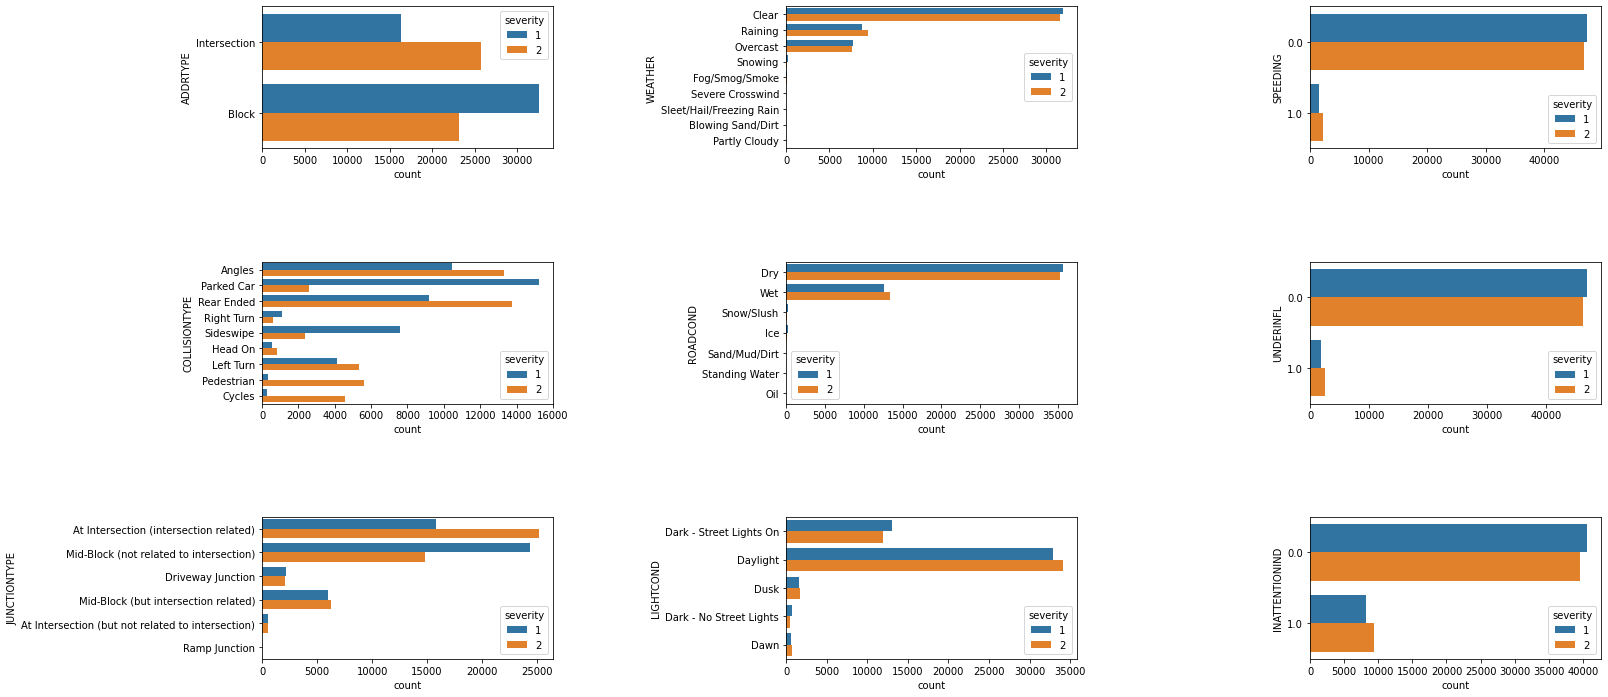

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(24,12))
plt.subplots_adjust(hspace = 0.8, wspace=0.8)
sns.countplot(y="ADDRTYPE", hue="severity", data=colData, ax=axs[0, 0])
sns.countplot(y="COLLISIONTYPE", hue="severity", data=colData, ax=axs[1, 0])
sns.countplot(y="JUNCTIONTYPE", hue="severity", data=colData, ax=axs[2, 0])
sns.countplot(y="WEATHER", hue="severity", data=colData, ax=axs[0, 1])
sns.countplot(y="ROADCOND", hue="severity", data=colData, ax=axs[1, 1])
sns.countplot(y="LIGHTCOND", hue="severity", data=colData, ax=axs[2, 1])
sns.countplot(y="SPEEDING", hue="severity", data=colData, ax=axs[0, 2])
sns.countplot(y="UNDERINFL", hue="severity", data=colData, ax=axs[1, 2])
sns.countplot(y="INATTENTIONIND", hue="severity", data=colData, ax=axs[2, 2])

/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/lib/python3.8/site-packages

/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/usr/lib/python3.8/site-packages

Feature ADDRTYPE: 0.021187
Feature COLLISIONTYPE: 0.127402
Feature JUNCTIONTYPE: 0.024580
Feature WEATHER: 0.002351
Feature ROADCOND: 0.003454
Feature LIGHTCOND: 0.003414
Feature SPEEDING: 0.003851
Feature UNDERINFL: 0.000538
Feature INATTENTIONIND: 0.000000


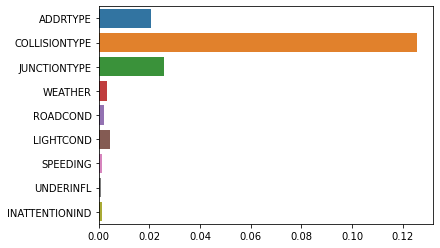

In [30]:
# example of mutual information feature selection for categorical data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

 
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
	data = read_csv(filename, header=None)
	# retrieve numpy array
	dataset = data.values
	# split into input (X) and output (y) variables
	X = dataset[:, :-1]
	y = dataset[:,-1]
	# format all fields as string
	X = X.astype(str)
	return X, y
 
# prepare input data
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc
 
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc
 
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

def calc_entropy(X, y, n):
    scores = []
    result = np.zeros(len(X.columns))
    
    for i in range(n):
        # split into train and test sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
        # prepare input data
        X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
        # prepare output data
        y_train_enc, y_test_enc = prepare_targets(y_train, y_test)
        # feature selection
        X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
        # what are scores for the features
        result = fs.scores_ + result
        
    return result / n

X = X_resampled
X = X.drop(columns=['X','Y', 'PERSONCOUNT', 'VEHCOUNT', 'severity'])
X = X.astype(str)
y = y_resampled

result = calc_entropy(X, y, 10)

for i in range(len(result)):
	print('Feature %s: %f' % (X.columns[i], fs.scores_[i]))
# Plot the scores

sns.barplot(y=X.columns, x=result)

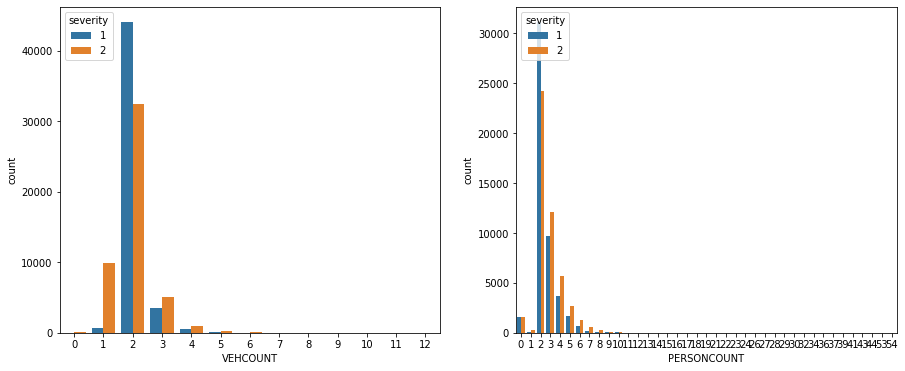

In [16]:
fig, axs = plt.subplots(ncols=2, figsize=(15,6))
sns.countplot(x="VEHCOUNT", hue="severity", data=colData, ax=axs[0])
sns.countplot(x="PERSONCOUNT", hue="severity", data=colData, ax=axs[1])

In [17]:
"""
import folium
from folium import plugins

latitude = colData.Y.mean()
longitude = colData.X.mean()

# create map and display it
seattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# instantiate a mark cluster object for the incidents in the dataframe
collisions = plugins.MarkerCluster().add_to(seattle_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(colData.Y, colData.X, colData.severity):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(collisions)

# display map
seattle_map
"""

'\nimport folium\nfrom folium import plugins\n\nlatitude = colData.Y.mean()\nlongitude = colData.X.mean()\n\n# create map and display it\nseattle_map = folium.Map(location=[latitude, longitude], zoom_start=12)\n\n# instantiate a mark cluster object for the incidents in the dataframe\ncollisions = plugins.MarkerCluster().add_to(seattle_map)\n\n# loop through the dataframe and add each data point to the mark cluster\nfor lat, lng, label, in zip(colData.Y, colData.X, colData.severity):\n    folium.Marker(\n        location=[lat, lng],\n        icon=None,\n        popup=label,\n    ).add_to(collisions)\n\n# display map\nseattle_map\n'